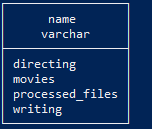

In [188]:
## dummy data

df = pd.DataFrame({
    'score': [np.random.rand() if i < 10 else np.nan for i in range(20)],
    'name': [f'name_{i}' if i < 15 else np.nan for i in range(20)],
    'int_values': [i if i < 13 else np.nan for i in range(20)]
})

df



,score,name,int_values
0,0.376119,name_0,0.0
1,0.571858,name_1,1.0
2,0.592297,name_2,2.0
3,0.151968,name_3,3.0
4,0.778560,name_4,4.0
5,0.858532,name_5,5.0
6,0.833850,name_6,6.0
7,0.736762,name_7,7.0
8,0.506476,name_8,8.0
9,0.902076,name_9,9.0


In [183]:
con = duckdb.connect(database=DATABASE_PATH, read_only=False)
df = con.execute("""
SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'writing' AS table_name,
    'writing.writer_id' AS Field,
    CASE
      WHEN writer_id IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    writing
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error


UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'writing' AS table_name,
    'writing.movie_id' AS Field,
    CASE
      WHEN movie_id IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    writing
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error
                 
UNION ALL
                 
SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'writing' AS table_name,
    'writing.audit_time' AS Field,
    CASE
      WHEN audit_time IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    writing
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error

UNION ALL
                 
SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'directing' AS table_name,
    'directing.director_id' AS Field,
    CASE
      WHEN director_id IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    directing
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'directing' AS table_name,
    'directing.movie_id' AS Field,
    CASE
      WHEN movie_id IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    directing
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'directing' AS table_name,
    'directing.audit_time' AS Field,
    CASE
      WHEN audit_time IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    directing
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error
                 

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'movies' AS table_name,            
    'movies.movie_id' AS Field,
    CASE
      WHEN movie_id IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.primary_title' AS Field,
    CASE
      WHEN primary_title IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.original_title' AS Field,
    CASE
      WHEN original_title IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.start_year' AS Field,
    CASE
      WHEN start_year IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error
                 
UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.runtime_min' AS Field,
    CASE
      WHEN runtime_min IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.num_votes' AS Field,
    CASE
      WHEN num_votes IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.label' AS Field,
    CASE
      WHEN label IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.subset' AS Field,
    CASE
      WHEN subset IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.title_changed' AS Field,
    CASE
      WHEN title_changed IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.title_length' AS Field,
    CASE
      WHEN title_length IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error

UNION ALL

SELECT 
  Field,
  table_name,
  correct_or_error,
  COUNT(correct_or_error) AS Count
FROM (
  SELECT
    'movies' AS table_name,
    'movies.audit_time' AS Field,
    CASE
      WHEN audit_time IS NULL THEN 'Error'
      ELSE 'Correct'
    END AS correct_or_error
  FROM 
    movies
) AS subquery
GROUP BY 
  Field,
  table_name,
  correct_or_error






""").fetch_df()
con.close()
df

,Field,table_name,correct_or_error,Count
0,writing.writer_id,writing,Correct,22131
1,writing.movie_id,writing,Correct,22131
2,writing.audit_time,writing,Correct,22131
3,directing.director_id,directing,Correct,11160
4,directing.movie_id,directing,Correct,11160
5,directing.audit_time,directing,Correct,11160
6,movies.movie_id,movies,Correct,10000
7,movies.primary_title,movies,Correct,10000
8,movies.original_title,movies,Correct,10000
9,movies.start_year,movies,Correct,10000


In [187]:
df.to_csv('all_error_table.csv', index = False)